<a href="https://colab.research.google.com/github/anishjohnson/Airbnb-Booking-Analysis/blob/main/Airbnb_Bookings_Analysis_Anish_johnson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

.

# ***Our objective through this notebook is to understand and provide helpful conclusions about the Airbnb dataset through Explorative Data Analysis, which then could be used in decision making and model building for further predictions.***

## **Import the required libraries and data.**

In [2]:
# Import the libraries that will be used.
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 7)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import data by mounting the google drive.
from google.colab import drive
drive.mount('/content/drive')

# Load the data
airbnb_data = pd.read_csv('/content/drive/MyDrive/Capstone data files/Airbnb NYC 2019.csv')

Mounted at /content/drive


In [46]:
# First look at our data.
airbnb_data.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [47]:
airbnb_data.tail()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48782,36425863,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.0,1,147
48790,36427429,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.0,6,339
48799,36438336,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.0,1,87
48805,36442252,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.0,1,40
48852,36455809,Brooklyn,Bushwick,40.69805,-73.92801,Private room,30,1,1,2019-07-08,1.0,1,1


> ***Well the dataframe contains numerical as well as categorical features!***

> ***But how many of these features are categorical and how many are numerical?, and what about the number of rows and columns?***

> ***And does the data contain any null values?***

> ***Lets find out...🔍***



In [5]:
# Drop unwanted columns.
airbnb_data.drop(['name', 'host_id',	'host_name'], inplace=True, axis=1)  # We drop these columns as they contain high cardinality and could expose details about the host.

In [6]:
# Find out the shape of our data.
airbnb_data.shape

(48895, 13)

In [7]:
# Lets get some info regarding this data.
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   last_review                     38843 non-null  object 
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [8]:
# Check for null values.
airbnb_data.isnull().sum()

id                                    0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*From the above observation we can see:*
1. *There are **48895 Rows** and **13 Columns**,*
2. *Out of which **9 are numerical** and **4 are categorical** fetures.*
3. *And there are few columns with null values present in them which needs to be removed.*

In [9]:
# Droping the null values.
airbnb_data.dropna(inplace=True)

In [10]:
# Recheck the shape.
airbnb_data.shape

(38843, 13)

In [11]:
airbnb_data.isnull().sum()

id                                0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

***Good!! now that we have dropped the null values lets take a look at some statistics about our data.***

In [12]:
# Describe our data.
airbnb_data.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,1.069370e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.539000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720027e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755482e+07,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*Ooops!!🤔*
> *The above table shows that the **minimum_nights stayed is 1 and the** **minimum price payed is 0$**, which is impossible unless Airbnb plans to provide rooms free of cost.* 

> *Which indirectly means that there exist few rows in which the value for minimum_nights is 1 and the respective rent(price) paid is 0.*

> *Inorder to solve this we will have to replace these rows with the average of the minimum prices paid for 1 night multiplied by the total nights stayed, i.e **[price = avg(min_prices)x(total_nights_stayed)]**, therefore lets assume that the minimum prices to be paid for 1 night ranges between (0-100) and get an average of all the prices less than 100$.*



In [13]:
# Lets make a copy of our dataset before making any changes.
airbnb_data_copy = airbnb_data.copy()

In [14]:
# First get the columns with price = 0.
airbnb_data_copy[airbnb_data_copy['price']==0]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26841,21291569,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333
26866,21304320,Brooklyn,Bushwick,40.69166,-73.90928,Shared room,0,30,5,2019-05-24,0.26,6,139


In [15]:
# Second get the average of minimum prices paid.
min_avg_price = round(airbnb_data_copy.loc[airbnb_data_copy['price'] < 100, 'price'].mean())
min_avg_price

65

In [16]:
# Third replace the price = 0 with min_avg_price.
airbnb_data_copy['price'] = np.where((airbnb_data_copy['price'] == 0),
                                     (min_avg_price*airbnb_data_copy['minimum_nights']),
                                     airbnb_data_copy['price'])

In [17]:
# Finally check if the prices have been replaced or not.
airbnb_data_copy[airbnb_data_copy['price']==0]

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


.

***Yuhooo!!*** *🙌*
***we have successfull replaced the rows with price = 0***. 

***Lets get the statistics again.*** *📊*

In [18]:
airbnb_data_copy.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,40.728134,-73.951148,142.448472,5.868059,29.297557,1.373221,5.164457,114.882888
std,1.069370e+07,0.054990,0.046695,197.363353,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.539000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720027e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755482e+07,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


* *It can be seen that 75th percentile for price is 170 and the max value is 10000 which indicates the presence of outliers.*
* *Similarly for minimum_nights the 75th percentile is 4 whereas the max value is 1250.*
* *Lets see more about these in EDA.*

.

***Now lets bring in the charts and diagrams to understand our data better.*** *📈📉📊*

# ***EDA:***

In [19]:
# Start by getting the numeric and categorical features.

numeric_features = airbnb_data_copy.describe().columns

categorical_fetures = airbnb_data_copy.describe(exclude=[int, float]).columns

print('Numeric Features:',list(numeric_features))
print('_'*185)
print('Categorical Features:',list(categorical_fetures))

Numeric Features: ['id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
_________________________________________________________________________________________________________________________________________________________________________________________
Categorical Features: ['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']


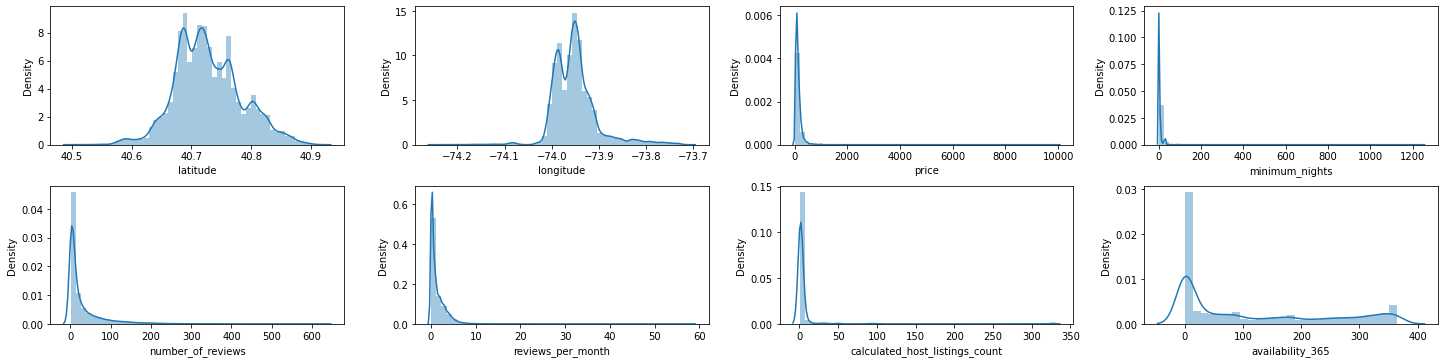

In [20]:
# Lets check out the numeric_features to understand their distributions.

names = numeric_features.values[1:]  #exclude id.
ncols = 4
fig, axes = plt.subplots(2,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2, w_pad=4)

for name, ax in zip(names, axes.flatten()):
    sns.distplot(airbnb_data_copy[name], ax=ax)
    
plt.show()

.

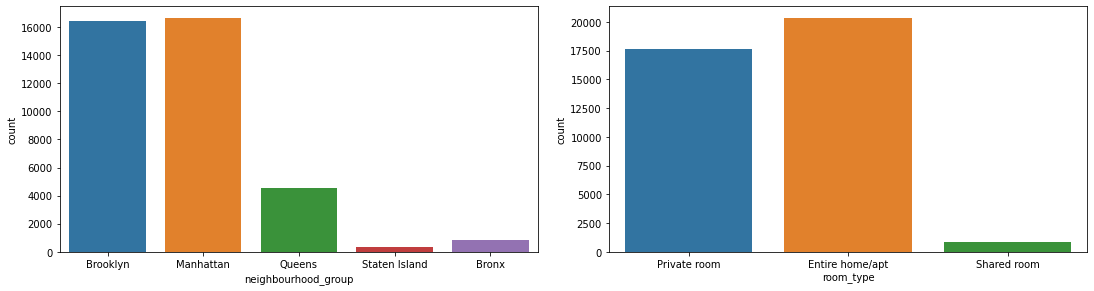

In [21]:
# Checkout few categorical features. (exclude 'last_review', 'neighbourhood' as these type of data contain high cardinality)

names = categorical_fetures.values[0:3:2]
ncols = 2
fig, axes = plt.subplots(1,ncols, figsize=(15,4))
fig.tight_layout(h_pad=2, w_pad=4)

for name, ax in zip(names, axes.flatten()):
    sns.countplot(airbnb_data_copy[name], ax=ax)
    
plt.show()

In [22]:
# Get the one-hot-encoding done for the above two categorical features.
airbnb_data_copy = pd.get_dummies(airbnb_data_copy, columns=['neighbourhood_group', 'room_type'])

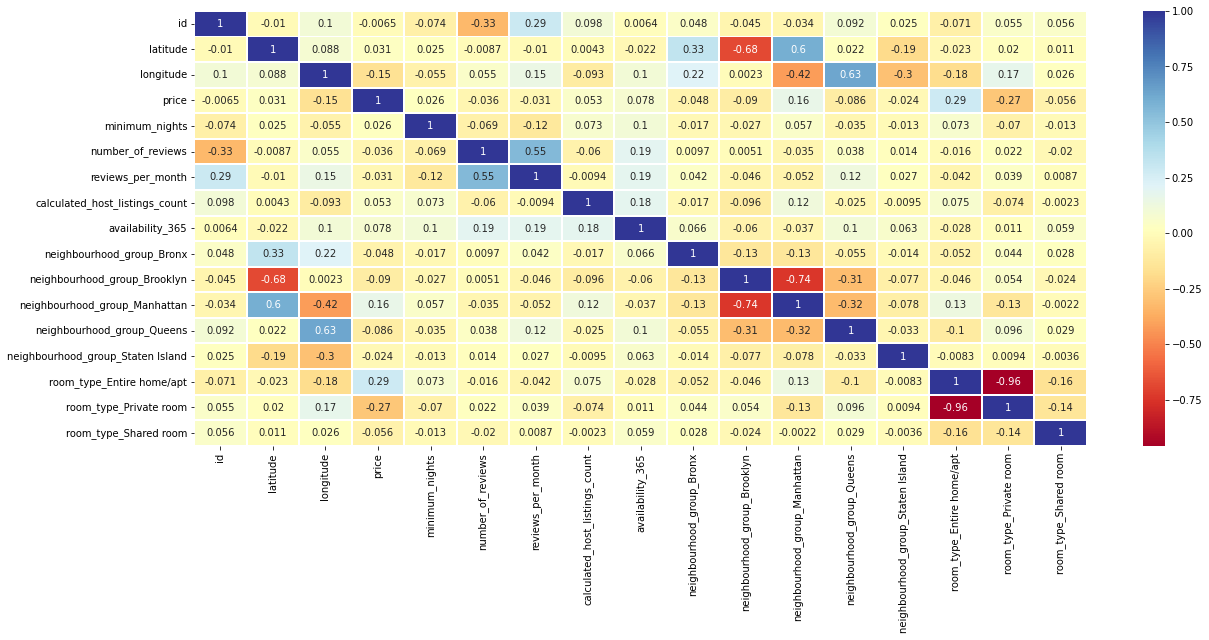

In [23]:
# Now lets check for multicolinearity.
correlation = airbnb_data_copy.corr()
fig = plt.figure(figsize=(20,8))
sns.heatmap(correlation, annot=True, linewidths=1, cmap='RdYlBu')

In [24]:
# Check for the OutLiers!!
# Create a dataset copy for the numeric_features.
df = airbnb_data_copy[numeric_features[1:]]

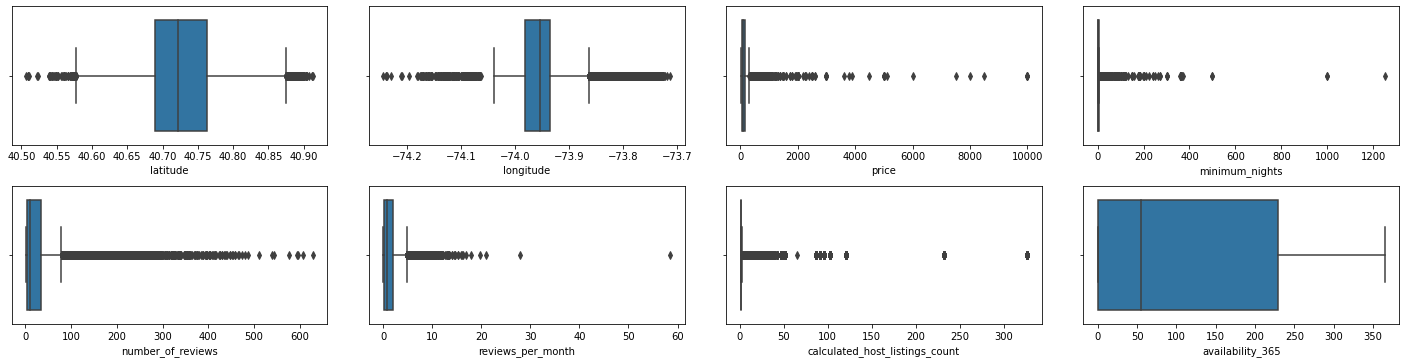

In [25]:
# Plot boxplots to find outliers distribution.
names = df.columns
ncols = 4
fig, axes = plt.subplots(2,ncols, figsize=(20,5))
fig.tight_layout(h_pad=2)

for name, ax in zip(names, axes.flatten()):
    sns.boxplot(x=name, data=df, ax=ax)
    
plt.show()

***Now what stories do these charts & diagrams tell us.....lets see*** *👀*

1. Distributions and skewness of our numeric_features:
> From the distplots it can be observed that most of the numeruc_features are positively skewed, whereas latitude and longitude data seem somewhat normally distributed. This indicates that these features have to be transformed inorder to remove the skewness.

 > **Below are the some type of method or way to deal above type of problem.**

        square-root for moderate skew : sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

        log for greater skew : log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

        inverse for severe skew : 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

.
2. Most prefered neighbourhood_group and room type.
> Barplots for the categorical_features (neighbourhood_group and room type) show that the most preferd neighbourhood_groups are **Brooklyn** and **Manhatan** whereas the most prefered room_type are either a **Private room** or an **Entire Home/Apt**.

.
3. Correlation between the variables.
```
id is highly correlated with host_id
number_of_reviews is highly correlated with reviews_per_month
latitude and longitude are highly correlated with different neighbourhood_groups
```

.
4. Outliers!!
> The boxplots indicate that the features contain mild as well as extreme outliers present which can be treated either using the IQR or the Z-score.

***Now that we have completed the basic exploaration for our data lets dive deep..*** *🐱‍🏍*

# **What can we learn about different hosts and areas?**

*Lets see which of these areas have highest number of hosts present and what kind of rooms are most preferred.*

In [41]:
# Groupby the different id's w.r.t neighbourhood_groups.

hosts_and_areas_df = airbnb_data.groupby(['neighbourhood_group'],
                                         as_index=False)['id'].count().sort_values(['id'],
                                          ascending=False).rename(columns={'neighbourhood_group':'location', 'id':'hosts_count'})

In [40]:
hosts_and_areas_df

,location,hosts_count
2,Manhattan,16632
1,Brooklyn,16447
3,Queens,4574
0,Bronx,876
4,Staten Island,314


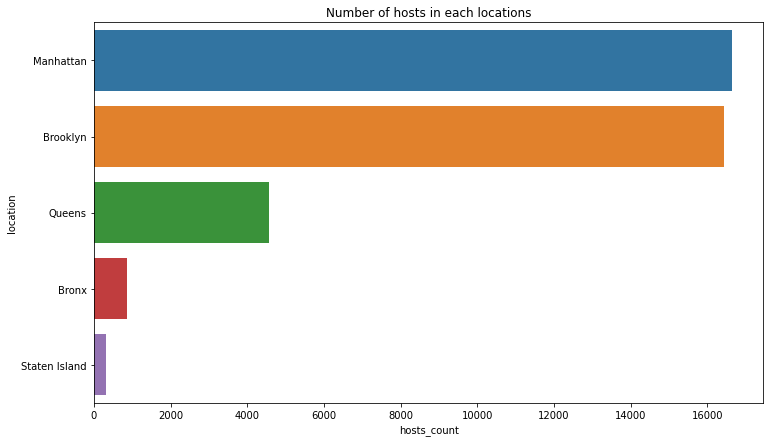

In [28]:
# Lets plot it for better understanding.
plt.title('Number of hosts in each locations')
sns.barplot(x=hosts_and_areas_df['hosts_count'], y=hosts_and_areas_df['location'])
plt.show()

*It would be safe to say that majority of the hosts are belong to the locations* ***Manhatan*** and ***Brooklyn***, *hence making these the most popular destinations.*

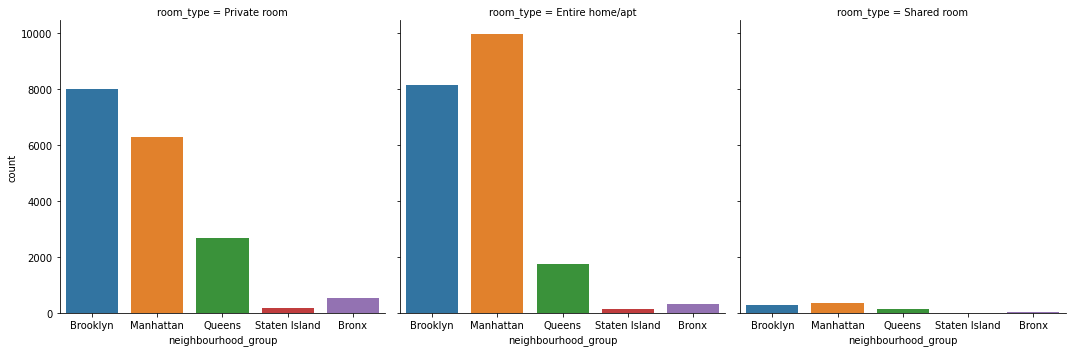

In [42]:
# Check which room_types are more popular in these areas.
room_type_and_areas = sns.catplot(data=airbnb_data,x='neighbourhood_group',kind='count',col='room_type')

*Hosts in the Manhatan and Brooklyn provide either a Private room or Entire home/apt.*

.

# **What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [54]:
# Lets find out the median price required to stay at different neighbourhood_groups.
# We will have to use median to get the estimate as mean would create biasness due to the skewed distribution for the price data.(outliers present in price data.)

median_price_by_locations = airbnb_data.groupby('neighbourhood_group', as_index=False)['price'].median().sort_values(['price'], 
                                  ascending=False).rename(columns={'neighbourhood_group': 'location', 'price': 'median_price' })
median_price_by_locations

,location,median_price
2,Manhattan,140
1,Brooklyn,94
4,Staten Island,75
3,Queens,72
0,Bronx,65


***Median price is highest for Manhatan followed by Brooklyn and other locations.*** ***The higher number of hosts present in these areas might be the reason for these high prices.***

In [31]:
airbnb_data.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


# **Which hosts are the busiest and why?**

*Lets try to understand which of the hosts are bussiest and what is the reason behind it...to do so lets segregate the id, neighbourhood_group and room_type on the basis of total number of reviews recived to the particular host and their availability in a year.*

In [32]:
# Create different datasets to groupby the data according to number_of_reviews and availability_365.
bussiest_host_by_review = airbnb_data.groupby(['id', 'neighbourhood_group', 'room_type'],
                                              as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)


bussiest_host_by_availability = airbnb_data.groupby(['id', 'neighbourhood_group', 'room_type'],
                                                    as_index=False)['availability_365'].mean().sort_values(['availability_365'],ascending = False)                                                                                                   

In [44]:
# Now merge the both datasets.
bussiest_host_df = pd.merge(bussiest_host_by_review,bussiest_host_by_availability,
                            on = ['id', 'neighbourhood_group', 'room_type']).sort_values(['availability_365','number_of_reviews'],
                            ascending = [True,False]).rename(columns = {'number_of_reviews':'No. of reviews','availability_365':'Availability in a year'})

# Check the top 50 entries.                        
bussiest_host_df.head(50)


,id,neighbourhood_group,room_type,No. of reviews,Availability in a year
9,166172,Brooklyn,Private room,480,0
27,7670562,Queens,Private room,424,0
33,7675781,Queens,Private room,408,0
56,17779504,Queens,Private room,368,0
70,4282178,Brooklyn,Private room,351,0
95,17777654,Queens,Private room,325,0
108,322037,Brooklyn,Entire home/apt,320,0
114,4925517,Manhattan,Private room,318,0
129,531091,Queens,Private room,304,0
249,10130342,Brooklyn,Private room,255,0


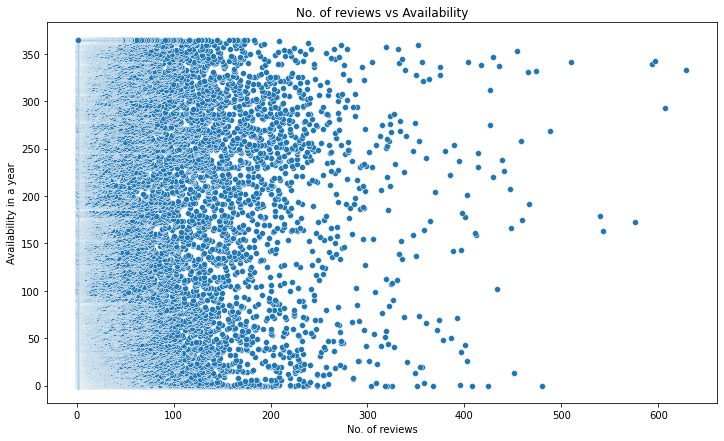

In [34]:
# Create a scatter plot to view the results.
plt.title('No. of reviews vs Availability')
# bussiest_host_df.plot.scatter(x='No. of reviews', y='Availability in a year', xlim=(100,1000),ylim=(10,380));
sns.scatterplot(data=bussiest_host_df, x='No. of reviews', y='Availability in a year')
plt.show()

***Mirror mirror on the wall whose the busiest host among them all!!*** *🪞*
* *The above analysis makes few things clear:*

*1. The busiest hosts are providers from the major cities Manhatan, Brooklyn and Queens.*

*2. The top 50 values for the room_type are either private rooms or entire room/apt which implies, hosts who can provide these type of stays are more preferred or are more busy.*

*3. Taking a look at the scatter plot shows that as the No. of reviews increases the availability throughout the year decreases, which indirectly means that the places whih high number of reviews are busiest of all, i.e these hosts get booked ASAP making them busy throughout the year.*



# **Is there any noticeable difference of traffic among different areas and what could be the reason for it?**

In [35]:
# First: check the traffic among different locations.

''' To check the traffic among the locations we will add the number
     of nights spend at the respective location and group them.  '''

     
traffic_by_location = airbnb_data.groupby(['neighbourhood_group'], 
                    as_index=False)['minimum_nights'].sum().sort_values(['minimum_nights'], 
                    ascending = False).rename(columns={'neighbourhood_group':'location', 'minimum_nights':'total_nights_spent'})

----------------------------------------------------------------------------------------------------
        location  total_nights_spent
2      Manhattan              116596
1       Brooklyn               87511
3         Queens               19307
0          Bronx                3445
4  Staten Island                1074
----------------------------------------------------------------------------------------------------


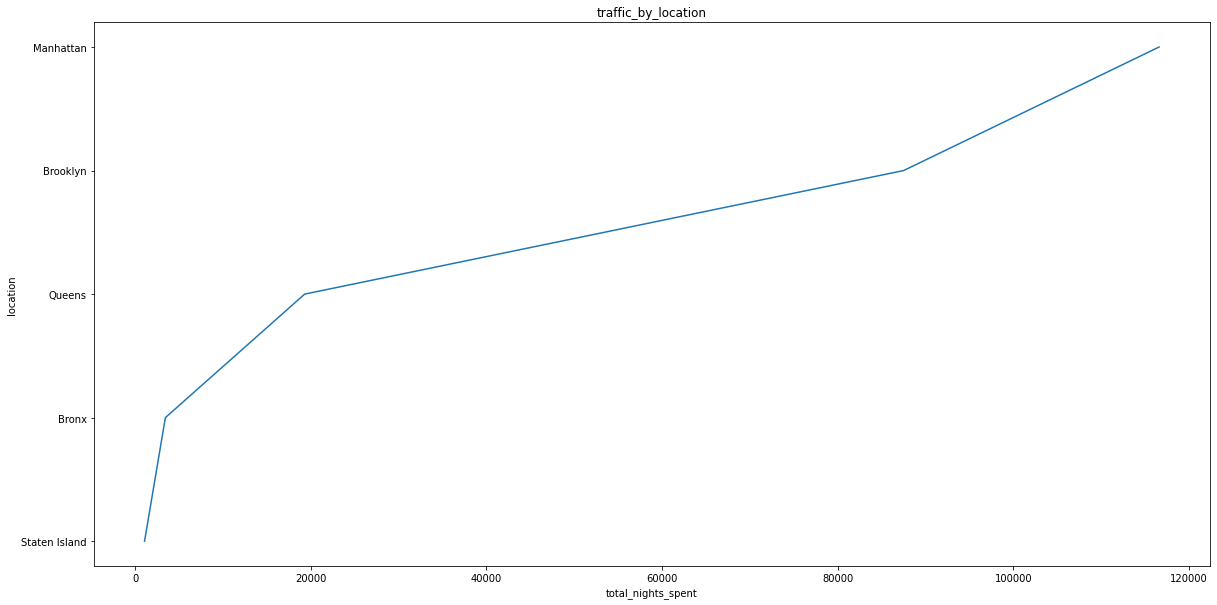

In [36]:
# Visualize it to understand better.
print('-'*100)
print(traffic_by_location) 
print('-'*100)
fig = plt.figure(figsize=(20,10))
plt.title('traffic_by_location')
sns.lineplot(x='total_nights_spent', y='location', data=traffic_by_location)
plt.show()

***Wow!!*** *There's a huge difference in the traffic between the locations. This brings the question, What might be the reason for such differences?, Lets find out.* 

***Answer:*** 
* *As we saw before maximum number of the hosts belong to the locations **Manhaten, Brooklyn and Queens**. More the number of hosts more options for the customers to choose when compared to other locations*. 
* *These locations are able to provide the most preferred room_types, hence attracting more people towards them.*
* *If we look at the reviews recived by the hosts from different locations the above three top again.*
* *All of these leads to the places to be booked throughout the year, which implies people who want these places may have to book months ahead, which leads to traffic in these locations.*